In [3]:
pip install deepface

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tf-keras

Note: you may need to restart the kernel to use updated packages.


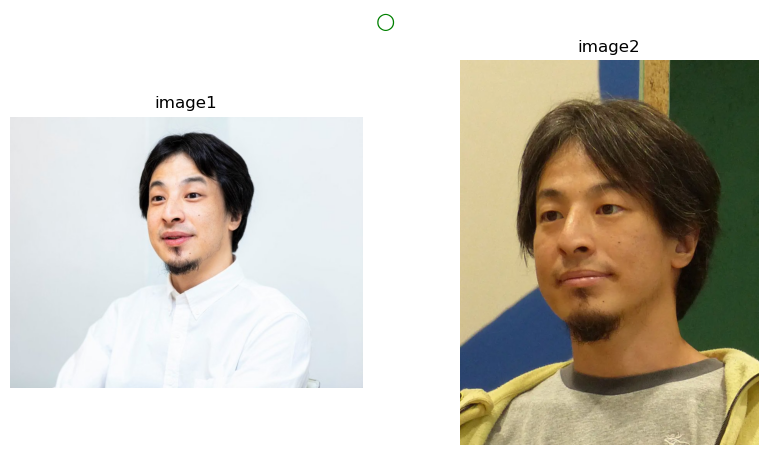

Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.05it/s]

image1の分析結果:
推定年齢: 32歳
性別: Man
人種: asian
感情: fear
--------------
image2の分析結果:
推定年齢: 26歳
性別: Man
人種: asian
感情: neutral
--------------
画像の類似度の距離: 0.4782176589708388


In [57]:
# 画像1、2のパスを指定
img1_path = "src/hiroyuki01.jpg"
img2_path = "src/hiroyuki02.jpg"

from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2

# 画像の比較を実行
result = DeepFace.verify(img1_path=img1_path, img2_path=img2_path)

# OpenCVを使って画像を読み込む
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# OpenCVはBGR形式で画像を読み込むため、RGB形式に変換
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# 画像を表示
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title("image1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title("image2")
plt.axis('off')

# 判定結果に応じて○や×を表示
if result['verified']:
    verification_result = "\u25CB"  # 緑の○（Unicode: \u25CB）
    title_color = 'green'
else:
    verification_result = "\u2716"  # 赤の×（Unicode: \u2716）
    title_color = 'red'

# 判定結果を表示
plt.suptitle(verification_result, fontsize=16, color=title_color)
plt.show()

# DeepFaceを使って画像1の分析を実行
objs1 = DeepFace.analyze(img_path=img1_path, actions=['age', 'gender', 'race', 'emotion'])
# DeepFaceを使って画像2の分析を実行
objs2 = DeepFace.analyze(img_path=img2_path, actions=['age', 'gender', 'race', 'emotion'])

# 画像1の結果を取得
age1 = objs1[0]['age']
gender1 = objs1[0]['dominant_gender']
race1 = objs1[0]['dominant_race']
emotion1 = objs1[0]['dominant_emotion']

# 画像2の結果を取得
age2 = objs2[0]['age']
gender2 = objs2[0]['dominant_gender']
race2 = objs2[0]['dominant_race']
emotion2 = objs2[0]['dominant_emotion']

# 画像1の分析結果を表示
print("image1の分析結果:")
print(f"推定年齢: {age1}歳")
print(f"性別: {gender1}")
print(f"人種: {race1}")
print(f"感情: {emotion1}")

print("--------------")

# 画像2の分析結果を表示
print("image2の分析結果:")
print(f"推定年齢: {age2}歳")
print(f"性別: {gender2}")
print(f"人種: {race2}")
print(f"感情: {emotion2}")

print("--------------")

# 結果を取得
print(f"画像の類似度の距離: {result['distance']}")